In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)
print("NumPy version:", np.__version__)

TensorFlow version: 2.18.0
NumPy version: 2.0.2


In [2]:
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 784)
Test data shape: (10000, 784)


In [3]:
latent_dim = 32
input_dim = 784

encoder_input = keras.Input(shape=(input_dim,))
x = layers.Dense(128, activation='relu')(encoder_input)
x = layers.Dense(64, activation='relu')(x)
encoder_output = layers.Dense(latent_dim, activation='relu')(x)
encoder = keras.Model(inputs=encoder_input, outputs=encoder_output, name="encoder")

decoder_input = keras.Input(shape=(latent_dim,))
x = layers.Dense(64, activation='relu')(decoder_input)
x = layers.Dense(128, activation='relu')(x)
decoder_output = layers.Dense(input_dim, activation='sigmoid')(x) # Sigmoid for pixel values between 0 and 1
decoder = keras.Model(inputs=decoder_input, outputs=decoder_output, name="decoder")

autoencoder_input = keras.Input(shape=(input_dim,))
encoded = encoder(autoencoder_input)
decoded = decoder(encoded)
autoencoder = keras.Model(inputs=autoencoder_input, outputs=decoded, name="autoencoder")

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

print("--- Encoder Architecture ---")
encoder.summary()
print("\n--- Decoder Architecture ---")
decoder.summary()
print("\n--- Autoencoder Architecture ---")
autoencoder.summary()

--- Encoder Architecture ---


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,816 (432.88 KB)

 Trainable params: 110,816 (432.88 KB)

 Non-trainable params: 0 (0.00 B)


--- Decoder Architecture ---


Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,568 (435.81 KB)

 Trainable params: 111,568 (435.81 KB)

 Non-trainable params: 0 (0.00 B)


--- Autoencoder Architecture ---


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 32)             │       110,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 784)            │       111,568 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
history = autoencoder.fit(x_train, x_train,
                          epochs=10,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))

print("\n✅ Training complete.")

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0936 - val_loss: 0.0365
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0334 - val_loss: 0.0251
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0239 - val_loss: 0.0206
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0204 - val_loss: 0.0184
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0184 - val_loss: 0.0169
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0169 - val_loss: 0.0158
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0159 - val_loss: 0.0151
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0150 - val_loss: 0.0141
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0142 - val_loss: 0.0134
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0135 - val_loss: 0.0128

✅ Training complete.


Shape of generated noise vectors: (5, 32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


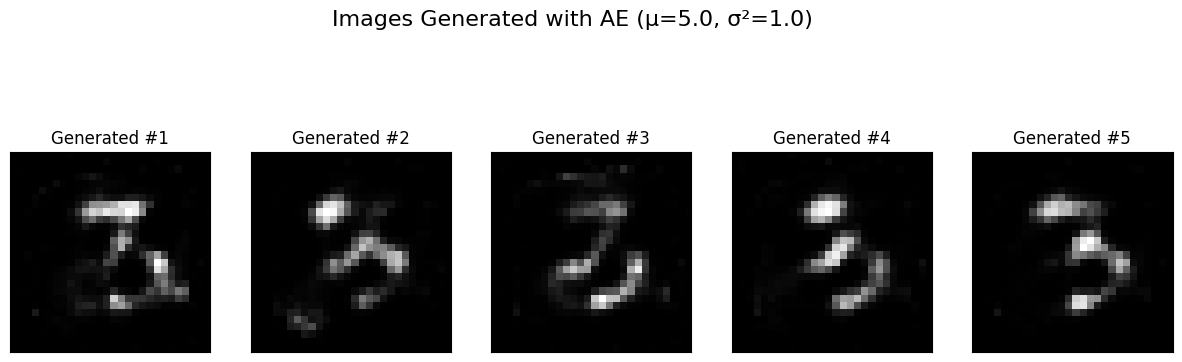

In [5]:
num_images_to_generate = 5

mean = 5.0
variance = 1.0
std_dev = np.sqrt(variance)
random_latent_vectors = np.random.normal(loc=mean,
                                         scale=std_dev,
                                         size=(num_images_to_generate, latent_dim))

print(f"Shape of generated noise vectors: {random_latent_vectors.shape}")

generated_images = decoder.predict(random_latent_vectors)
generated_images = generated_images.reshape(num_images_to_generate, 28, 28)

plt.figure(figsize=(15, 5))
for i in range(num_images_to_generate):
    ax = plt.subplot(1, num_images_to_generate, i + 1)
    plt.imshow(generated_images[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(f"Generated #{i+1}")
plt.suptitle(f"Images Generated with AE (μ={mean}, σ²={variance})", fontsize=16)
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)
print("NumPy version:", np.__version__)

TensorFlow version: 2.18.0
NumPy version: 2.0.2


In [ ]:
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

x_train = (x_train.astype('float32') / 255.).reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = (x_test.astype('float32') / 255.).reshape((len(x_test), np.prod(x_test.shape[1:])))

print("Clean training data shape:", x_train.shape)
print("Clean test data shape:", x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Clean training data shape: (60000, 784)
Clean test data shape: (10000, 784)


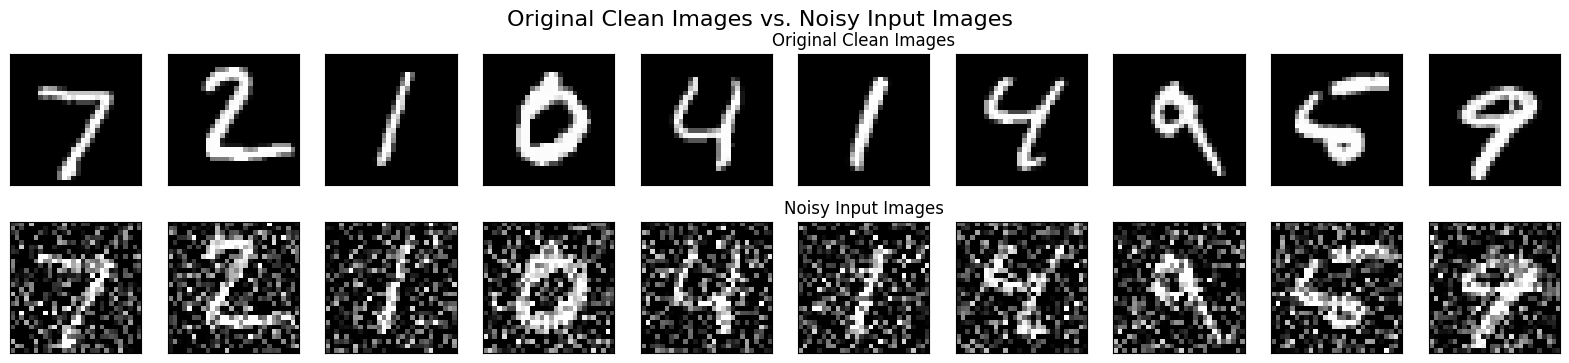

In [ ]:
noise_factor = 0.4

x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

n = 10
plt.figure(figsize=(20, 4))
plt.suptitle("Original Clean Images vs. Noisy Input Images", fontsize=16)
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n//2: ax.set_title("Original Clean Images")

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n//2: ax.set_title("Noisy Input Images")

plt.show()

In [ ]:
latent_dim = 32
input_dim = 784

encoder_input = keras.Input(shape=(input_dim,))
x = layers.Dense(128, activation='relu')(encoder_input)
x = layers.Dense(64, activation='relu')(x)
encoder_output = layers.Dense(latent_dim, activation='relu')(x)
encoder = keras.Model(inputs=encoder_input, outputs=encoder_output, name="encoder")

decoder_input = keras.Input(shape=(latent_dim,))
x = layers.Dense(64, activation='relu')(decoder_input)
x = layers.Dense(128, activation='relu')(x)
decoder_output = layers.Dense(input_dim, activation='sigmoid')(x)
decoder = keras.Model(inputs=decoder_input, outputs=decoder_output, name="decoder")

autoencoder_input = keras.Input(shape=(input_dim,))
encoded = encoder(autoencoder_input)
decoded = decoder(encoded)
autoencoder = keras.Model(inputs=autoencoder_input, outputs=decoded, name="autoencoder")


autoencoder.compile(optimizer='adam', loss='mean_squared_error')

print("\n--- Decoder Architecture ---")
decoder.summary()


--- Decoder Architecture ---


Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,568 (435.81 KB)

 Trainable params: 111,568 (435.81 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0932 - val_loss: 0.0429
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0402 - val_loss: 0.0340
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0328 - val_loss: 0.0288
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0283 - val_loss: 0.0260
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0259 - val_loss: 0.0245
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0245 - val_loss: 0.0235
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0234 - val_loss: 0.0225
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0223 - val_loss: 0.0215
Epoch 9/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0214 - val_loss: 0.0208
Epoch 10/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0207 - val_loss: 0.0201
Epoch 11/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0202 - val_loss: 0.0198
Epoch 12/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/ste

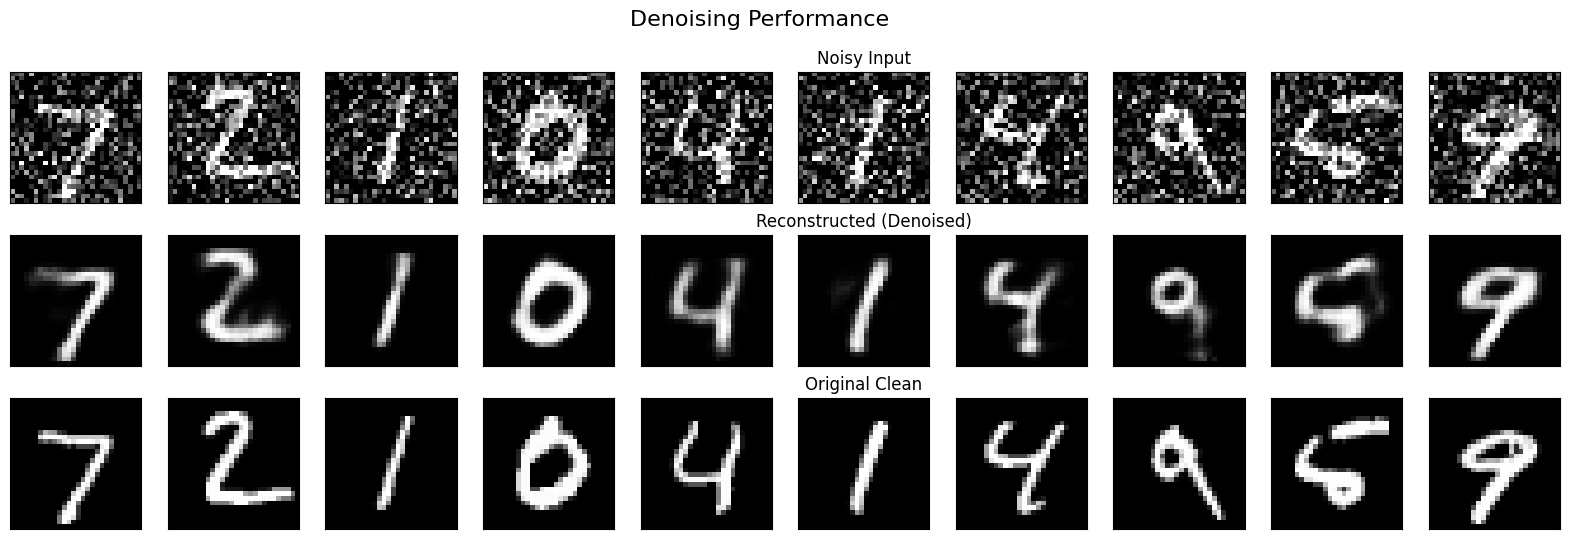

In [ ]:
history = autoencoder.fit(x_train_noisy, x_train, # <--- The key difference is here!
                          epochs=25,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test_noisy, x_test))

print("\n✅ Denoising training complete.")

decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 6))
plt.suptitle("Denoising Performance", fontsize=16)
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n//2: ax.set_title("Noisy Input")

    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n//2: ax.set_title("Reconstructed (Denoised)")

    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n//2: ax.set_title("Original Clean")
plt.show()

Shape of generated noise vectors: (5, 32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


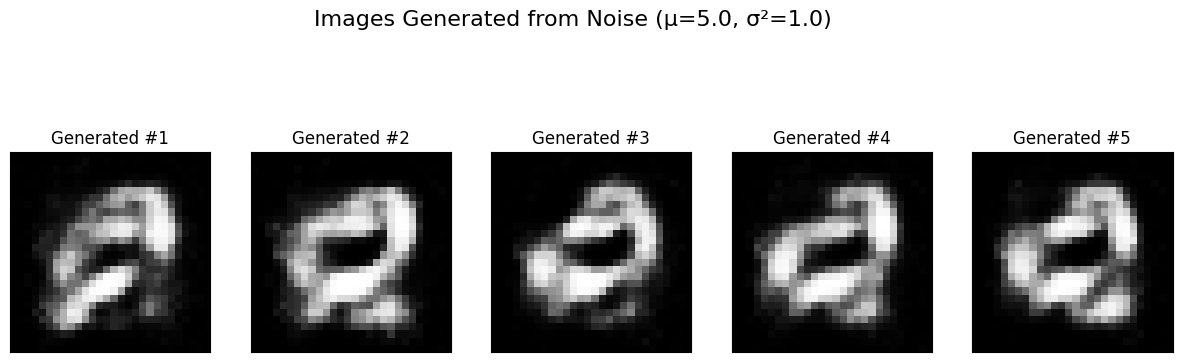

In [ ]:
num_images_to_generate = 5

mean = 5.0
variance = 1.0
std_dev = np.sqrt(variance)

random_latent_vectors = np.random.normal(loc=mean,
                                         scale=std_dev,
                                         size=(num_images_to_generate, latent_dim))

print(f"Shape of generated noise vectors: {random_latent_vectors.shape}")

generated_images = decoder.predict(random_latent_vectors)

generated_images = generated_images.reshape(num_images_to_generate, 28, 28)

plt.figure(figsize=(15, 5))
for i in range(num_images_to_generate):
    ax = plt.subplot(1, num_images_to_generate, i + 1)
    plt.imshow(generated_images[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(f"Generated #{i+1}")
plt.suptitle(f"Images Generated from Noise (μ={mean}, σ²={variance})", fontsize=16)
plt.show()